Original Weights :  [16334, 91488, 83852]
Final Weights :  [-65587.0, 20942.13426678747, 38531.164469068404]


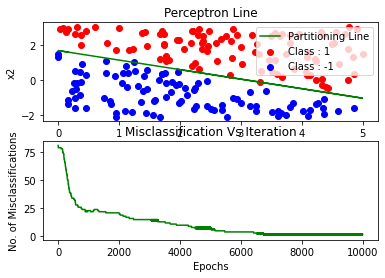

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

# Importing the excel sheet
dataset = pd.read_excel("PLA_Data1.xlsx")
shape = dataset.shape

# Assigning 1 to the Dummy Variable
x0 = []
for _ in range(shape[0]):
    x0.append(int(1))

# Adding the X0 in the dataset
dataset['x0'] = x0

#Separating the Features in
features = np.array(dataset.iloc[:,[0,1,3]])
output = np.array(dataset.iloc[:,2])

#print(features)
#print(output)

# Assigning Random weights at first
weights = []
for _ in range(3):
    weights.append(random.randint(10000,100000))
    #weights.append(random.random())
weights_org = copy.deepcopy(weights)

#signum function
def Signum(x):
    if x>=0:
        return 1
    return -1

# Iterating
misclassify_count, epoch = [], []
for i in range(10000):
    count = 0
    for x_features, y_output in zip(features,output):
        y_pred_temp = weights[1]*x_features[0] + weights[2]*x_features[1] + weights[0]*x_features[2]
        y_pred_temp = Signum(y_pred_temp)
        if y_output != y_pred_temp:
            weights[0] = weights[0] + y_output*x_features[2]
            weights[1] = weights[1] + y_output*x_features[0]
            weights[2] = weights[2] + y_output*x_features[1]
            count = count + 1
    misclassify_count.append(count)
    epoch.append(i+1)

#Printing the Final Assigned Weights and Total change count
print("Original Weights : ",weights_org)
print("Final Weights : ",weights)

# Differentiation of the two classes for plotting
x1,y1,x2,y2 = [],[],[],[]
for x_features,y_output in zip(features,output):
    if(y_output == 1):
        x1.append(x_features[0])
        y1.append(x_features[1])
    else:
        x2.append(x_features[0])
        y2.append(x_features[1])

#Deriving the straight line for partitioning
X,Y = [],[]
for x_features in features:
    X.append(x_features[0])
    y_temp = -(weights[0] + weights[1]*x_features[0])/weights[2]
    Y.append(y_temp)


fig,axis = plt.subplots(2)

#Plotting
axis[0].scatter(np.array(x1),np.array(y1),c='r',label='Class : 1')
axis[0].scatter(np.array(x2),np.array(y2),c='b',label='Class : -1')
axis[0].plot(np.array(X),np.array(Y),c='g',label='Partitioning Line')
axis[0].legend(loc='upper right')
axis[0].set_title('Perceptron Line')
axis[0].set_xlabel('x1')
axis[0].set_ylabel('x2')

axis[1].set_title('Misclassification Vs Iteration')
axis[1].plot(np.array(epoch),np.array(misclassify_count),c='g')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('No. of Misclassifications')

plt.show()

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

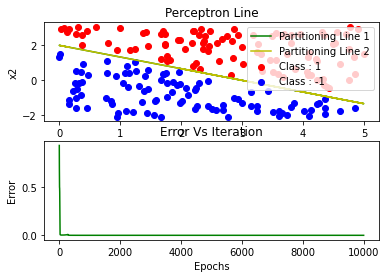

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import copy
from sklearn.preprocessing import OneHotEncoder

#Importing the Dataset
dataset = pd.read_excel("PLA_Data1.xlsx")
shape = dataset.shape
#print(dataset.head)

#Defining the Sigmoid Function
def phi(x,a=1):
    phi_func = 1/(1 + math.exp((-1)*a*x))
    return phi_func

#Defining the Sigmoid Derivative Function
def phi_derivative(x,a=1):
    phi_derv = (a*math.exp((-1)*a*x))*((1 + math.exp((-1)*a*x))**(-2))
    return phi_derv

# Assigning 1 to the Dummy Variable
x0 = []
for _ in range(shape[0]):
    x0.append(int(1))
x0 = pd.Series(x0)

dataset.insert(loc=0,column='x0',value=x0)
#print(dataset.head)

# Random values assigned to weights
weights = []
for _ in range(2):
    temp = []
    for _ in range(3):
        temp.append(random.randint(-10,10))
    weights.append(temp)
weights_org = copy.deepcopy(weights)

# Breaking into two parts, Attributes and Ouputs
attributes = np.array(dataset.iloc[:,[0,1,2]])
Output = np.array(dataset.iloc[:,-1])
output = pd.DataFrame(dataset.iloc[:,-1])

# Initialize the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the data using the encoder
one_hot = encoder.fit_transform(output)

# Print the one hot encoded data as a dataframe
output = pd.DataFrame(one_hot.toarray(), columns=encoder.get_feature_names_out())
output = np.array(output)
print(output)

epochs = 10000
Error = []

#Learning Rate
eta = 0.1

e = 1
count = 0
while(count<epochs):
    for x_features,y_output in zip(attributes,output):
        err = []
        #Un1
        total_input_1 = x_features[0]*weights[0][0] + x_features[1]*weights[0][1] + x_features[2]*weights[0][2]
        #Un2
        total_input_2 = x_features[0]*weights[1][0] + x_features[1]*weights[1][1] + x_features[2]*weights[1][2]

        transformed_1 = phi(total_input_1) #Vn1
        transformed_2 = phi(total_input_2) #Vn2

        Vn = [transformed_1,transformed_2]
        Un = [total_input_1,total_input_2]

        #Error pointwise
        e = (0.5)*((y_output[0]-Vn[0])**2 + (y_output[1]-Vn[1])**2)
        err.append(e)

        #Weight changing using Backpropagation Technique
        for wt,y,vni,uni in zip(weights,y_output,Vn,Un):
            wt[0] = wt[0] + eta*(y-vni)*(phi_derivative(uni))*x_features[0]
            wt[1] = wt[1] + eta*(y-vni)*(phi_derivative(uni))*x_features[1]
            wt[2] = wt[2] + eta*(y-vni)*(phi_derivative(uni))*x_features[2]

    #Appending the mean of the error for every round
    Error.append(np.mean(err))
    count = count + 1
    #eta = eta / 2

#Printing the Original and Final Weights
print("Original Weights : ",weights_org)
print("Final Weights : ",weights)

#Differentiation of the two classes for plotting
x1,y1,x2,y2 = [],[],[],[]
for x_features,y_output in zip(attributes,Output):
    if(y_output == 1):
        x1.append(x_features[1])
        y1.append(x_features[2])
    else:
        x2.append(x_features[1])
        y2.append(x_features[2])

#Deriving the straight line for partitioning for Perceptron Line 1
X,Y = [],[]
for x_features in attributes:
    X.append(x_features[1])
    y_temp = -(weights[0][0] + weights[0][1]*x_features[1])/weights[0][2]
    Y.append(y_temp)

#Deriving the straight line for partitioning for Perceptron Line 2
X1,Y1 = [],[]
for x_features in attributes:
    X1.append(x_features[1])
    y_temp = -(weights[1][0] + weights[1][1]*x_features[1])/weights[1][2]
    Y1.append(y_temp)

fig,axis = plt.subplots(2)

#Plotting
axis[0].scatter(np.array(x1),np.array(y1),c='r',label='Class : 1')
axis[0].scatter(np.array(x2),np.array(y2),c='b',label='Class : -1')
axis[0].plot(np.array(X),np.array(Y),c='g',label='Partitioning Line 1')
axis[0].plot(np.array(X1),np.array(Y1),c='y',label='Partitioning Line 2')
axis[0].legend(loc='upper right')
axis[0].set_title('Perceptron Line')
axis[0].set_xlabel('x1')
axis[0].set_ylabel('x2')

axis[1].set_title('Error Vs Iteration')
#axis[1].plot(np.array(range(epochs)),np.array(Error),c='g')
axis[1].plot(np.array(range(count)),np.array(Error),c='g')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Error')

plt.show()